# MNIST Digit Classification

SKIP most for PBDS Meetup 07/18/2019


[Show MNIST digit set image]


In [1]:
# Using TensorFlow 1.13.1
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

# Add tensorflow.keras imports
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.datasets import mnist

print("TensorFlow:", tf.__version__, " Keras:", keras.__version__)

TensorFlow: 1.13.1  Keras: 2.2.4-tf


Using TensorFlow backend.


# MNIST Digits Dataset



In [2]:
# Read Keras MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("train_images.shape:", train_images.shape, "train_labels len:", len(train_labels))

train_images.shape: (60000, 28, 28) train_labels len: 60000


In [3]:
# First three labels
print("MNIST First four labels:\n", train_labels[:4])
# First digit
print("MNIST First digit (partial crop):\n", train_images[0,4:26,6:24])

MNIST First four labels:
 [5 0 4 1]
MNIST First digit (partial crop):
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127]
 [  0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64]
 [  0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0]
 [  0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0]
 [  0   0  80 156 107 253 253 205  11   0  43 154   0   0   0   0   0   0]
 [  0   0   0  14   1 154 253  90   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 139 253 190   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  11 190 253  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  35 241 225 160 108   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  81 240 253 253 119  25   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  45 186 253 253 150  27   0   0   0   0]
 [  0   0   0   0   0   0   0

## Preparing MNIST Digits for Input to MLP

Convert MNIST images for perceptron input
* from 2-D arrays of 28 x 28 pixels, 
* to 1-D vector of 784 (28*28) numbers, scaled to range [0, 1].

In [4]:
# MNIST images as normalized (_, 28*28) tensors for MLP
train_images_mlp = train_images.reshape((60000, 28 * 28))
train_images_mlp = train_images_mlp.astype('float32') / 255

test_images_mlp = test_images.reshape((10000, 28 * 28))
test_images_mlp = test_images_mlp.astype('float32') / 255

In [5]:
# First digit
(shape0, mean0) = (train_images_mlp[0].shape[0], np.mean(train_images_mlp[0]))
(min0, max0) = (np.min(train_images_mlp[0]), np.max(train_images_mlp[0]))
print("MNIST First digit shape:", shape0, "mean:", mean0, "- min, max:", min0, max0)

MNIST First digit shape: 784 mean: 0.13768007 - min, max: 0.0 1.0


In [6]:
# Convert MNIST labels [0-9] to categorical
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [7]:
# First three labels
print("MNIST First three labels:\n", train_labels[:4])
print("First three labels categorical:\n", train_labels_cat[:4])

MNIST First three labels:
 [5 0 4 1]
First three labels categorical:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Multi-Layer Perceptron MNIST Classifier (MLP)


* MLP single-layer (~97% with one hidden layer, 256 nodes; total trainable params: 203,530)

### Homework
* MLP two-layer (~98% with two hidden layers) - skip
* Deep MLP with regularization (dropout, data augmentation) - skip


In [9]:
# Define MLP: one hidden layer of 256 nodes - 10-class softmax output
mlp = models.Sequential()
mlp.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
mlp.add(layers.Dense(10, activation='softmax'))

mlp.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Summarize MLP
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## Train Multi-Layer Perceptron on MNIST

* Use Keras `mlp.fit(train_inputs, train_outputs)`

In [11]:
# Train MLP; using validation_split = 0.2
history = mlp.fit(train_images_mlp, train_labels_cat, 
                  epochs=10, batch_size=128, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 25us/step - loss: 0.3247 - acc: 0.9085 - val_loss: 0.1709 - val_acc: 0.9499
Epoch 2/10
48000/48000 [==============================] - 1s 21us/step - loss: 0.1432 - acc: 0.9588 - val_loss: 0.1235 - val_acc: 0.9658
Epoch 3/10
48000/48000 [==============================] - 1s 21us/step - loss: 0.0976 - acc: 0.9716 - val_loss: 0.1127 - val_acc: 0.9668
Epoch 4/10
48000/48000 [==============================] - 1s 22us/step - loss: 0.0731 - acc: 0.9789 - val_loss: 0.0939 - val_acc: 0.9723
Epoch 5/10
48000/48000 [==============================] - 1s 21us/step - loss: 0.0568 - acc: 0.9836 - val_loss: 0.0887 - val_acc: 0.9739
Epoch 6/10
48000/48000 [==============================] - 1s 22us/step - loss: 0.0457 - acc: 0.9870 - val_loss: 0.0842 - val_acc: 0.9762
Epoch 7/10
48000/48000 [==============================] - 1s 21us/step - loss: 0

Epochs: 10, Best training acc: 0.9949375, Best val_acc: 0.9785000001589457


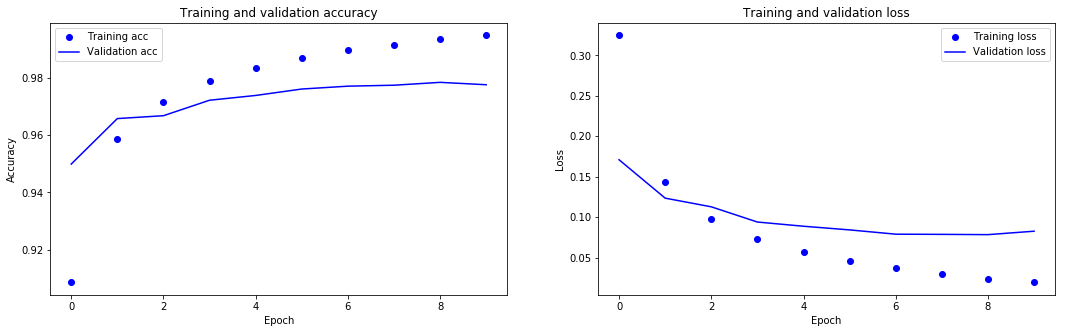

In [12]:
# Visualize MLP accuracy, loss on MNIST training and validation data

# Define acc, loss plot function
def plot_acc_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
    accuracy_template = "Epochs: {}, Best training acc: {}, Best val_acc: {}"
    print(accuracy_template.format(len(epochs), np.max(acc), np.max(val_acc)))

    plt.figure(figsize=(18,5))
    plt.subplot(121)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return None

plot_acc_loss(history)

## Evaluate Multi-Layer Perceptron on MNIST

* Use Keras `mlp.evaluate(test_inputs, test_outputs)`

In [13]:
# Evaluate MLP classifier
test_loss, test_acc = mlp.evaluate(test_images_mlp, test_labels_cat)
print('MLP Test accuracy:', test_acc, '- MLP Test loss:', test_loss)

10000/10000 [==============================] - 0s 19us/step
MLP Test accuracy: 0.98 - MLP Test loss: 0.07149975089433429


# Convolutional Neural Networks (CNNs)

* LeCun, 1989.

ZIPCODE digit recognizer



## CNN Elements: Filters, Layers, Strides and Padding


Figure

# Convolutional Neural Network MNIST Classifier (CNN)

* CNN (~98% with one hidden layer) - skip
* CNN (~99.2% with three hidden layers, total trainable params: 130,890)
* CNN Test accuracy: 0.9919

Contrast CNN trainable parameters and accuracy (~99.2%, trainable params: 130,890) 
to single-layer MLP (~98% with one hidden layer, 256 nodes; total trainable params: 203,530).


In [14]:
# Keras CNN MNIST classifier - Three-Layer Convolutional Neural Network
# CNN input (28, 28, 1) images - CNN output (3, 3, 64) tensor
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Fully-connected (MLP) output classifier - 10-class softmax output
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Model summary
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               73856     
__________

## Preparing MNIST Digits for Input to CNN

Convert MNIST images for CNN input
* from 2-D array of 28 x 28 pixels, 
* to 3-D tensor of shape (28, 28, 1), scaled to range [0, 1].

In [16]:
# MNIST images as (_, 28, 28, 1) tensors for CNN input
train_images_cnn = train_images.reshape((60000, 28, 28, 1))
train_images_cnn = train_images_cnn.astype('float32') / 255

test_images_cnn = test_images.reshape((10000, 28, 28, 1))
test_images_cnn = test_images_cnn.astype('float32') / 255
print("train_images_cnn.shape:", train_images_cnn.shape)
print("train_labels_cat len:", len(train_labels_cat))

train_images_cnn.shape: (60000, 28, 28, 1)
train_labels_cat len: 60000


## Train CNN with MLP output classifier

In [17]:
# Train CNN with MLP output classifier
history = cnn.fit(train_images_cnn, train_labels_cat, 
                    epochs=10, batch_size=64, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 21s 395us/step - loss: 0.1697 - acc: 0.9481 - val_loss: 0.0450 - val_acc: 0.9862
Epoch 2/10
54000/54000 [==============================] - 22s 406us/step - loss: 0.0478 - acc: 0.9850 - val_loss: 0.0375 - val_acc: 0.9875
Epoch 3/10
54000/54000 [==============================] - 23s 420us/step - loss: 0.0317 - acc: 0.9900 - val_loss: 0.0356 - val_acc: 0.9895
Epoch 4/10
54000/54000 [==============================] - 22s 416us/step - loss: 0.0244 - acc: 0.9923 - val_loss: 0.0329 - val_acc: 0.9913
Epoch 5/10
54000/54000 [==============================] - 22s 414us/step - loss: 0.0198 - acc: 0.9939 - val_loss: 0.0356 - val_acc: 0.9908
Epoch 6/10
54000/54000 [==============================] - 22s 409us/step - loss: 0.0161 - acc: 0.9952 - val_loss: 0.0537 - val_acc: 0.9880
Epoch 7/10
54000/54000 [==============================] - 22s 409us/step - loss: 0.0136 - acc: 0.9959 - val_loss: 0.0

Epochs: 10, Best training acc: 0.9975740740740741, Best val_acc: 0.9941666666666666


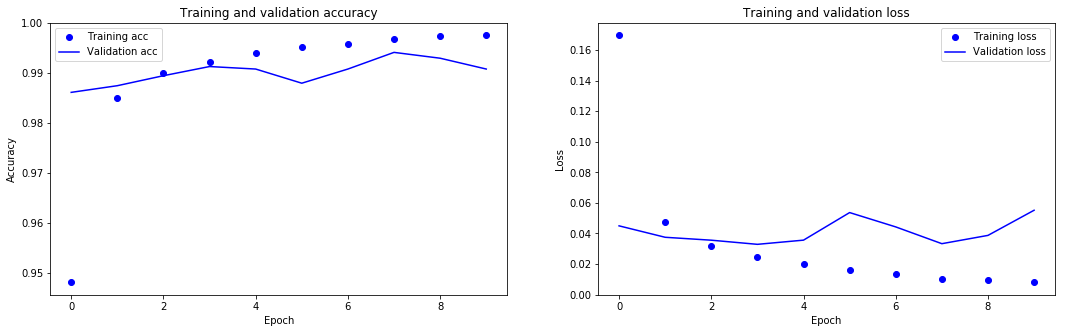

In [18]:
# Plot acc, loss
plot_acc_loss(history)

## Evaluate CNN classifier

In [19]:
# Evaluate CNN classifier
test_loss, test_acc = cnn.evaluate(test_images_cnn, test_labels_cat)
print('CNN Test accuracy:', test_acc, 'CNN Test loss:', test_loss)

10000/10000 [==============================] - 1s 104us/step
CNN Test accuracy: 0.9914 CNN Test loss: 0.040052228675535165


# MNIST with Traditional Machine Learning 

## Multinomial MNIST Classifiers

### Homework: Naive Bayes (NB), Stochastic Gradient Descent (SGD)

GaussianNB, SGDClassifier from Scikit-Learn

* e.g., sklearn.GaussianNB, sklearn.SGDClassifier (MNIST accuracy of ~85%)

## Feature engineering

Feature engineering is important, more so for shallow MLP and traditional statistical classifiers.

* Input scaling (e.g., sklearn.StandardScaler on MNIST improves accuracy to ~90%)
* Deep networks beat hand-engineered features, with optimal, automatically learned features of, for example, CNN filters


# Capsules Neural Network MNIST Classifier (CapsNet)


* Capsule Networks (CapsNet, Sabour, X, Hinton, 2017; Zhen, KPU, 2019) - skip


# MNIST State-of-the-Art (SOTA)

## MNIST Test accuracy stands at 99.83% (in 2019)


#### Record (03/2019)
* Zhao et al., 2019, report absolute MNIST error rate reduction from previous best 0.21% (99.79% accuracy) to 0.17% (99.83% accuracy).
* *Capsule Networks with Max-Min Normalization*, 
Zhen Zhao, Ashley Kleinhans, Gursharan Sandhu, Ishan Patel, K. P. Unnikrishnan, 2019, 
https://arxiv.org/abs/1903.09662.

#### Others (2017 -  2018)
* *Regularization of neural networks using dropconnect*, Li Wan, Matthew D Zeiler, Sixin Zhang, Yann LeCun, and Rob Fergus, ICML 2013.
99.79% accuracy (0.39% error rate; 0.21% with ensembling)

* *Dynamic Routing Between Capsules*,
Sara Sabour, Nicholas Frosst, Geoffrey E Hinton, 2017 
(https://arxiv.org/abs/1710.09829)
99.75% accuracy (0.25% error rate)

* Simple 3-layer CNN above (total params, 130,890) without any training regularization: `acc: 99.15%`


## CapsNet with Max-Min: MNIST Test set errors


Misclassified MNIST images using 3-model majority vote from CapsNets trained using Max-Min normalization

<img src="./images/MNIST_maxmin_2019.png" alt="Max-Min MNIST Test errors" width="600">

* Total of 17 digit errors in 10,000 digit test set (99,83% test accuracy)
* MNIST digit index 6576 - Ground Truth: "7"
* current deep networks recognize as "1"; no human makes such error

Source: [*Capsule Networks with Max-Min Normalization*, Zhao et al., 2019](https://arxiv.org/abs/1903.09662)


## After 30 years, MNIST Test must be considered a *validation* set

### ... it is no longer a *test* set.

MNIST Test can no longer be considered a proper Test set. 
It is a digit classification Validation set.

The MNIST dataset availability and focus on the MNIST task since 1989 have made the MNIST,  10,000 digit *"Test"* set  into a "validation" dataset.
  * New *test sets* for MNIST, different from the original 1990 one, are needed!
  * A new digit recognition benchmark is needed.


### MNIST improvements are near the end (only 20 digits left for improvement)

The MNIST Test set has a total of 60,000 training and 10,000 test digits.

Zhao et al., 2019, use single classifiers with recognition error on only 20 to 23 digits of the 10,000 MNIST test digits.
